<a href="https://colab.research.google.com/github/TWilly240/Snoasis/blob/main/NewplotofReceiptbyhour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## data cleaned

cleaned data. added month column and removed question marks from time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/camdenlol/SnOasis/main/snoasisData.csv')

In [4]:
df.tail(25)

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment
76194,11/5/2023,4:14:50?PM,SnOasis Main,37173,Small,NaN,NaN,1,1.0,0.0,1.0,Yes,No,0.09,1.09,NaN,NaN,0.0,NaN
76195,11/5/2023,4:22:22?PM,SnOasis Main,37174,Small,NaN,NaN,5,5.0,0.0,5.0,Yes,No,0.47,5.47,NaN,NaN,0.0,NaN
76196,11/5/2023,4:29:01?PM,SnOasis Main,37175,Small,NaN,NaN,7,7.0,0.0,7.0,Yes,No,0.66,7.66,NaN,NaN,0.0,NaN
76197,11/5/2023,4:35:22?PM,SnOasis Main,37176,Small,NaN,NaN,3,3.0,0.0,3.0,Yes,No,0.28,3.28,NaN,NaN,0.0,NaN
76198,11/5/2023,4:36:47?PM,SnOasis Main,37177,Extra Lime,NaN,NaN,1,1.0,0.0,1.0,Yes,No,0.09,1.09,NaN,NaN,0.0,NaN
76199,11/5/2023,4:37:32?PM,SnOasis Main,37178,Small,NaN,NaN,1,1.0,0.0,1.0,Yes,No,0.09,1.09,NaN,NaN,0.0,NaN
76200,11/5/2023,4:40:37?PM,SnOasis Main,37179,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76201,11/5/2023,4:41:20?PM,SnOasis Main,37180,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76202,11/5/2023,4:43:42?PM,SnOasis Main,37181,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76203,11/5/2023,4:53:35?PM,SnOasis Main,37182,Small,NaN,NaN,2,2.0,0.0,3.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN


In [5]:
df.Time.loc[0][:-3]+" "+df.Time.loc[0][-2:]


'7:50:56 PM'

In [6]:
def getRidOfQuestion(string):
  return string[:-3]+" " +string[-2:]


In [7]:
 df.Time = df.Time.apply(getRidOfQuestion)

In [8]:
df.Date=pd.to_datetime(df.Date, format = '%m/%d/%Y')

In [9]:
df["MonthName"] = df.Date.dt.month_name()

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

# Convert AM/PM time to 24-hour format
#df['Time'] = df['Time'].dt.strftime('%H:%M:%S')


<ipython-input-10-588dd199e6de>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


<Axes: >

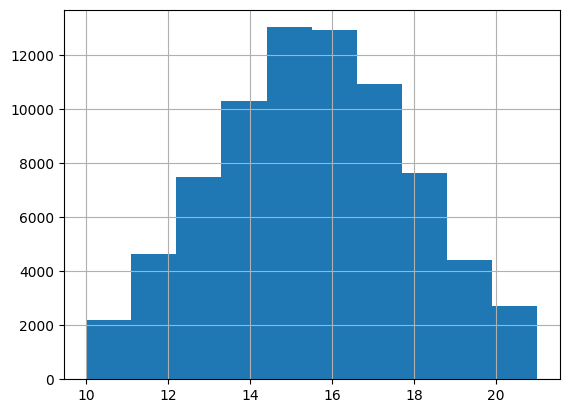

In [11]:
df.Time.dt.hour.hist()

In [12]:
df.groupby('Time')

In [13]:
df['hour'] = df.Time.dt.hour

In [14]:
df[df['Receipt number']==57]['Subtotal (USD)']

95    9.5
96    9.5
97    9.5
Name: Subtotal (USD), dtype: float64

<Axes: xlabel='hour'>

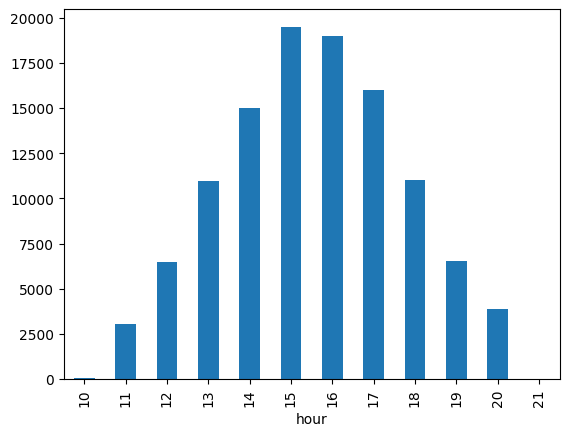

In [15]:
df.groupby('hour').sum("Quantity").Quantity.plot(kind = 'bar')

In [16]:
dgh = df.groupby('Receipt number').sum(numeric_only=True)

In [17]:
dgh.plot(kind = ('bar'))

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79549492d120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79549492c3a0> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='hour'>

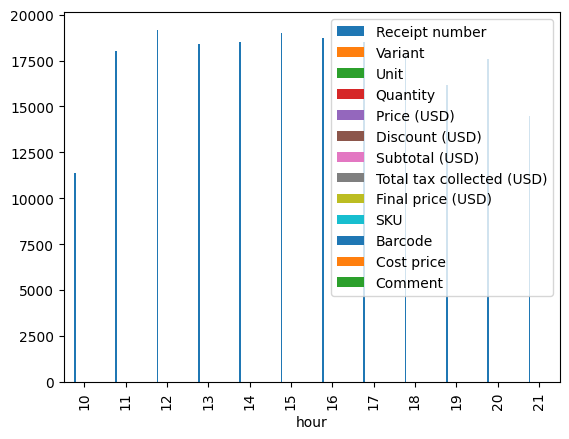

In [18]:
df.groupby('hour').mean('newSubtotal').plot(kind = 'bar')

In [19]:
dfg = df.groupby("Receipt number").sum('Final price (USD)')
dfg.head(60)

,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,hour
Receipt number,,,,,,,,,,,,,
1,0.0,0.0,1,1.00,0.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,19
2,0.0,0.0,1,1.00,0.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,19
3,0.0,0.0,1,1.00,0.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,19
4,0.0,0.0,1,1.50,0.0,1.50,0.14,1.64,0.0,0.0,0.0,0.0,20
5,0.0,0.0,1,1.00,0.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,21
6,0.0,0.0,3,2.50,0.0,7.50,0.24,2.74,0.0,0.0,0.0,0.0,63
7,0.0,0.0,1,1.50,0.0,1.50,0.14,1.64,0.0,0.0,0.0,0.0,21
8,0.0,0.0,1,2.25,0.0,2.25,0.21,2.46,0.0,0.0,0.0,0.0,21
9,0.0,0.0,1,1.50,0.0,1.50,0.14,1.64,0.0,0.0,0.0,0.0,21


In [20]:
dfg.loc[37182,"Subtotal (USD)"]

6.0

verifying that the df combines the receipts correctly (it does)

In [21]:
dfg["Final price (USD)"].mean()

5.887420421550704

$13 per ticket on average for the last year (non raised menu prices)

convert to new prices and find new average...new column...dictionary...new prices...redoing whole thing



In [30]:
dict1 = {"Kiddie": 2.00, "Small": 3.00, "Medium": 3.50, "Large": 4.75, "Extra Large": 5.50}
dict1["Kiddie"]

2.0

In [29]:
df.Name.unique()

array(['Gift card', 'Candy Bar', 'Add Nerds', 'Add Tajin', 'Energy Drink',
       'Cup of Gummies', 'Test', 'Snickers', 'Kit Kat', 'Skittles',
       'Large', 'Pickle', 'Tips', 'Kiddie', 'Small', 'Medium', 'Lime',
       'Caramel', 'Cream', 'Spoon Straw', 'Sour Patch Kids',
       'Extra Large', 'S M L Salty Dog Charge', 'Bottled Water',
       'Doritos', 'Pickle Pop', 'Extra Lime', 'Red Bull',
       'Kiddie Salty Dog Charge', 'Chocolate', 'Ruffles', 'Pup Cup',
       'XL Salty Dog Charge', nan, "Reese's", 'Tajin', 'Cheetos', 'Nerds',
       'Starburst', 'Pop Rocks', 'Bang', 'Alani', '5.31'], dtype=object)

In [28]:
dict2 = {'Gift card': 1.00, 'Candy Bar': 1.50, 'Add Nerds': 0.50, 'Add Tajin': 0.50, 'Energy Drink': 2.25,
       'Cup of Gummies': 1.50, 'Test': 5.00, 'Snickers': 1.50, 'Kit Kat': 1.50, 'Skittles': 1.50,
       'Large': 4.75, 'Pickle': 3.00, 'Tips': 1.00, 'Kiddie': 2.00, 'Small': 3.00, 'Medium': 3.50, 'Lime': 0.50,
       'Caramel': 0.50, 'Cream': 0.50, 'Spoon Straw': 2.00, 'Sour Patch Kids': 1.50,'Extra Large': 5.50, 'S M L Salty Dog Charge': 1.00, 'Bottled Water': 1.00,
       'Doritos': 1.00, 'Pickle Pop': 0.75, 'Extra Lime': 1.00, 'Red Bull': 3.00,
       'Kiddie Salty Dog Charge': 0.50, 'Chocolate': 0.50, 'Ruffles': 1.00, 'Pup Cup': 1.00,
       'XL Salty Dog Charge': 1.25, "Reese's": 1.50, 'Tajin': 0.50, 'Cheetos': 1.00, 'Nerds': 0.50,
       'Starburst': 1.50, 'Pop Rocks': 0.50, 'Bang': 3.00, 'Alani': 3.00, '5.31': 0.00}

In [33]:
df["newSubtotal"] = df.Name.apply(lambda x:dict2.get(x))* df.Quantity

df[df['Receipt number']==57]

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),...,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,MonthName,hour,newSubtotal
95,2023-03-04,2024-04-08 12:39:05,SnOasis Main,57,Medium,NaN,NaN,2,5.5,0.0,...,No,0.52,6.02,NaN,NaN,0.0,NaN,March,12,7.0
96,2023-03-04,2024-04-08 12:39:05,SnOasis Main,57,Small,NaN,NaN,1,2.0,0.0,...,No,0.19,2.19,NaN,NaN,0.0,NaN,March,12,3.0
97,2023-03-04,2024-04-08 12:39:05,SnOasis Main,57,Lime,NaN,NaN,4,2.0,0.0,...,No,0.19,2.19,NaN,NaN,0.0,NaN,March,12,2.0


In [25]:

dfg = df.groupby("Receipt number").sum('newSubtotal')

dfg

,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,hour
Receipt number,,,,,,,,,,,,,
1,0.0,0.0,1,1.0,0.0,1.0,0.00,1.00,0.0,0.0,0.0,0.0,19
2,0.0,0.0,1,1.0,0.0,1.0,0.00,1.00,0.0,0.0,0.0,0.0,19
3,0.0,0.0,1,1.0,0.0,1.0,0.00,1.00,0.0,0.0,0.0,0.0,19
4,0.0,0.0,1,1.5,0.0,1.5,0.14,1.64,0.0,0.0,0.0,0.0,20
5,0.0,0.0,1,1.0,0.0,1.0,0.00,1.00,0.0,0.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37192,0.0,0.0,2,2.0,0.0,2.0,0.19,2.19,0.0,0.0,0.0,0.0,17
37193,0.0,0.0,2,2.0,0.0,2.0,0.19,2.19,0.0,0.0,0.0,0.0,17
37194,0.0,0.0,2,2.0,0.0,2.0,0.19,2.19,0.0,0.0,0.0,0.0,17


In [26]:
df.loc[37196,"Subtotal (USD)"]

4.0

In [27]:
dfg["newSubtotal"].mean()*1.09

KeyError: 'newSubtotal'

<Axes: xlabel='hour'>

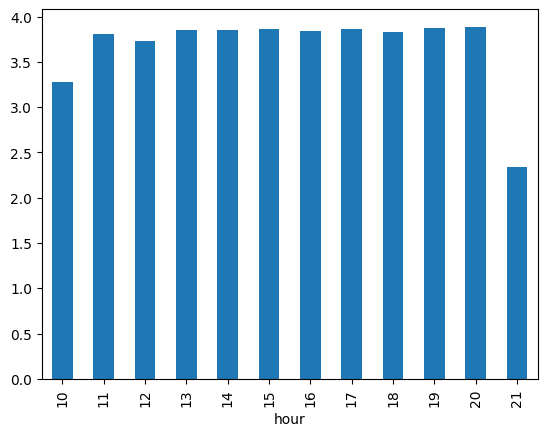

In [37]:
df.groupby(["Receipt number", "hour"]).mean("newSubtotal").groupby("hour").mean().newSubtotal.plot(kind = 'bar')